In [249]:
### 1. Importing libraries and data

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [250]:
%matplotlib inline

In [251]:
### 2. Import 'Chocolate bar rating 2022' dataset 

df = pd.read_csv(r'/Users/melissatoure/Documents/CF Data analytics program/Offical tasks reviewed /Data Immersion/Assigment off/Achievement 6 /df_choc_bar_rating_clean.csv', index_col = False)

In [252]:
path = '/Users/melissatoure/Documents/CF Data analytics program/Offical tasks reviewed /Data Immersion/Assigment off/Achievement 6 /6.4'

In [253]:
### 3. Data cleaning 

df.columns # No issues 

Index(['Unnamed: 0', 'REF', 'Company (Manufacturer)', 'Company Location',
       'Review Year', 'Country of Bean Origin',
       'Specific Bean Origin or Bar Name', 'Cocoa Percent', 'Ingredients',
       'Most Memorable Characteristics', 'Rating'],
      dtype='object')

In [254]:
df.head(5) # No issues 

,Unnamed: 0,REF,Company (Manufacturer),Company Location,Review Year,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
0,0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76%,"3- B,S,C","rich cocoa, fatty, bready",3.25
1,1,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76%,"3- B,S,C","cocoa, blackberry, full body",3.75
2,2,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76%,"3- B,S,C","cocoa, vegetal, savory",3.50
3,3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68%,"3- B,S,C","chewy, off, rubbery",3.00
4,4,2542,5150,U.S.A.,2021,India,"Anamalai, batch 1",68%,"3- B,S,C","milk brownie, macadamia,chewy",3.50


In [255]:
df.shape # No issues 

(2588, 11)

In [256]:
# Check for missing values

df.isnull().sum() # 87 missing values found in the 'Ingredients columns'

Unnamed: 0                           0
REF                                  0
Company (Manufacturer)               0
Company Location                     0
Review Year                          0
Country of Bean Origin               0
Specific Bean Origin or Bar Name     0
Cocoa Percent                        0
Ingredients                         87
Most Memorable Characteristics       0
Rating                               0
dtype: int64

In [257]:
# Imputation of missing values with specific value 'unknown'

df['Ingredients'].fillna('Unknown', inplace=True)

In [258]:
# Checking on the results 

df.isnull().sum()

Unnamed: 0                          0
REF                                 0
Company (Manufacturer)              0
Company Location                    0
Review Year                         0
Country of Bean Origin              0
Specific Bean Origin or Bar Name    0
Cocoa Percent                       0
Ingredients                         0
Most Memorable Characteristics      0
Rating                              0
dtype: int64

In [259]:
# Duplicates check 

duplicate_values = df.duplicated()

In [260]:
duplicate_values.shape

(2588,)

In [261]:
df[df.duplicated()] # No duplicates found

,Unnamed: 0,REF,Company (Manufacturer),Company Location,Review Year,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating


In [262]:
# Convert 'Cacao Percent' column in float to enable analyse 

df['Cocoa Percent'] = df['Cocoa Percent'].str.rstrip('%').astype(float) # % was removed as part of the conversion process 

In [263]:
df.describe() 

,Unnamed: 0,REF,Review Year,Cocoa Percent,Rating
count,2588.000000,2588.000000,2588.000000,2588.000000,2588.000000
mean,1293.500000,1459.185471,2014.545209,71.613022,3.198319
std,747.235572,773.852201,4.082722,5.577118,0.444069
min,0.000000,5.000000,2006.000000,42.000000,1.000000
25%,646.750000,820.000000,2012.000000,70.000000,3.000000
50%,1293.500000,1470.000000,2015.000000,70.000000,3.250000
75%,1940.250000,2122.000000,2018.000000,74.000000,3.500000
max,2587.000000,2768.000000,2022.000000,100.000000,4.000000


In [264]:
# Save df cleaned 

df.to_csv(os.path.join(path,'choc_bar_rating_clean_newversion.csv'))

In [265]:
# Import new cleaned 'Chocolate bar rating 2022' dataset 

df = pd.read_csv(r'/Users/melissatoure/Documents/CF Data analytics program/Offical tasks reviewed /Data Immersion/Assigment off/Achievement 6 /6.4/choc_bar_rating_clean_newversion.csv', index_col = False)

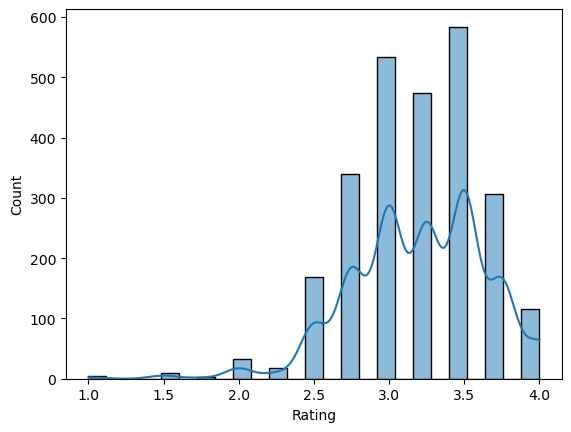

In [291]:
### 4. Exploring data 

df_rating = sns.histplot(df['Rating'], bins = 25, kde = True)

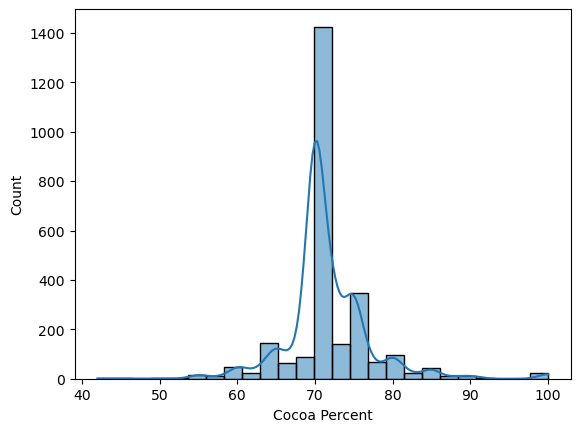

In [292]:
df_percent = sns.histplot(df['Cocoa Percent'], bins = 25, kde = True)

In [ ]:
### 5. Stating hypotheses : Cocoa percentage have an influence on rating. The darker the chocolate (over 70%) the better in terms of rating. 

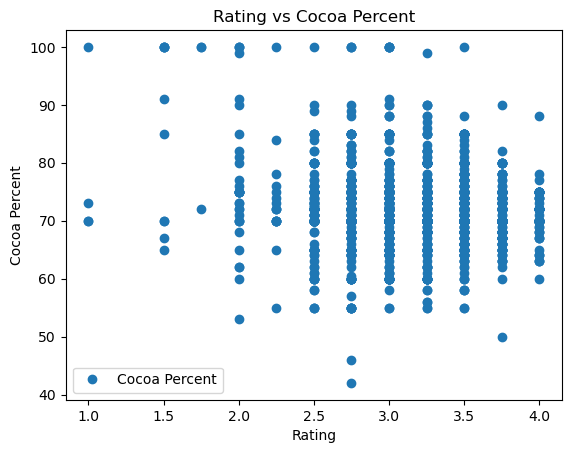

In [266]:
### 6. Data prep for regression analysis

#Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Rating', y='Cocoa Percent',style='o') 
plt.title('Rating vs Cocoa Percent'),
plt.xlabel('Rating'),
plt.ylabel('Cocoa Percent'), 
plt.show()

In [267]:
# Reshape the variables into NumPy arrays and put them into separate objects

X = df['Rating'].values.reshape(-1,1)
y = df['Cocoa Percent'].values.reshape(-1,1)

In [268]:
X

array([[3.25],
       [3.75],
       [3.5 ],
       ...,
       [3.  ],
       [3.25],
       [3.5 ]])

In [269]:
y

array([[76.],
       [76.],
       [76.],
       ...,
       [75.],
       [70.],
       [72.]])

In [270]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [271]:
### 7. Regression analysis

regression = LinearRegression() #Create a regression object

In [272]:
# Fit the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [273]:
# Predict the values of y using X

y_predicted = regression.predict(X_test)

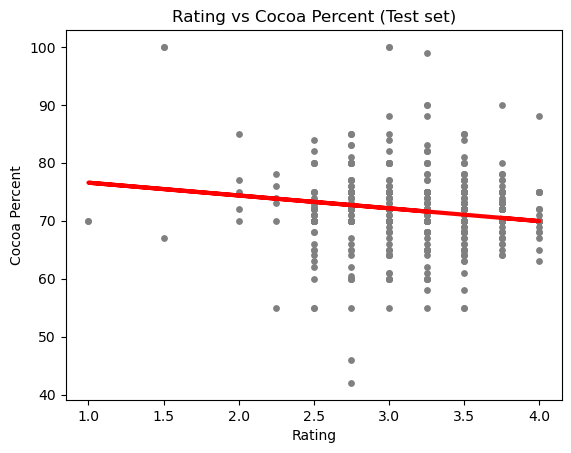

In [286]:
# Create a plot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Rating vs Cocoa Percent (Test set)')
plot_test.xlabel('Rating')
plot_test.ylabel('Cocoa Percent')
plot_test.show() # The red line does not cover all the data points, on the contrary, all data points are gradually scattered away from the line. Hence, it translate a strong negative relationsip between the variables.  




In [275]:
# Create objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted) # Mean Squared Error
r2 = r2_score(y_test, y_predicted) # R2 score

In [278]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)


Slope: [[-2.21128642]]
Mean squared error:  30.7237338232595
R2 score:  -0.009582456008777607


In [289]:
### 8. Create a dataframe comparing the actual and predicted values of y.

y_predicted_train = regression.predict(X_train)
data = pd.DataFrame({'Actual' : y_test.flatten(),'Predicted' : y_predicted.flatten() })
data.head(15)

,Actual,Predicted
0,70.0,71.590065
1,78.0,71.590065
2,70.0,73.248530
3,72.0,72.142886
4,70.0,70.484422
5,67.0,70.484422
6,70.0,70.484422
7,77.0,71.037243
8,70.0,71.037243
9,65.0,71.590065


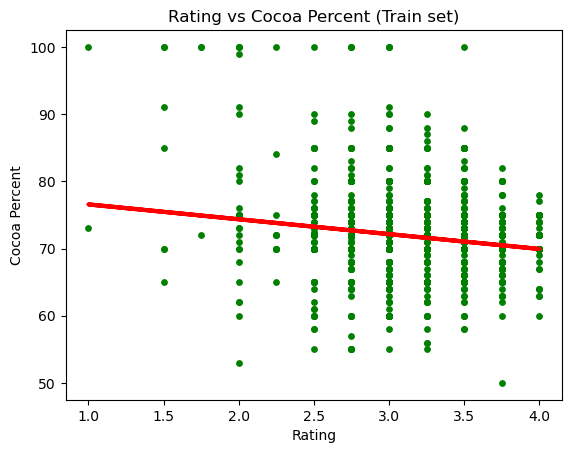

In [288]:
# Visualizing the training set results

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Rating vs Cocoa Percent (Train set)')
plot_test.xlabel('Rating')
plot_test.ylabel('Cocoa Percent')
plot_test.show()

In [ ]:
### 9. Insights : Based of the results, we can see that the slope is negative with a value of approx. -2.211, which suggests an inverse relationship between the predictor and the target. Then, we can see that the R2 score is also negative with a value of -0.009, which shows that the model seems to be a very poor fit for the data. Regarding, the mean squared error, the value is 30.7237338232595 which is quite large. Indeed, a lower value would have been better. Finally, we can see that there’s quite a difference between the actual and predicted 'y' values which shows that then model is not very efficient to explain the relationship of the variables. To conclude, we can see that the model did not perform quite well since it did not provide any meaningful predictions. 


